# Distribuciones en forma de anillo

In [5]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def ring(r_min=0, r_max=1, n_samples=360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

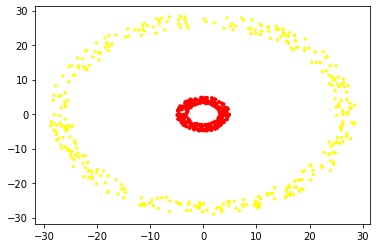

In [7]:
data1 = ring(3, 5)
data2 = ring(25, 29)

data = np.concatenate([data1, data2], axis=0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0, len(data2))]])
plt.scatter(data[:,0], data[:,1], c=labels, s=5, cmap="autumn")

# Algoritmo de Kmeans

In [8]:
from sklearn.cluster import KMeans

/home/alex/anaconda3/envs/Curso-ML-Python/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/alex/anaconda3/envs/Curso-ML-Python/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
km = KMeans(2).fit(data)

In [10]:
clusters = km.predict(data)

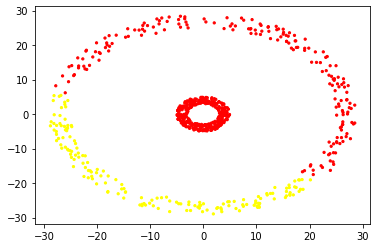

In [11]:
plt.scatter(data[:,0], data[:,1], c=clusters, s=5, cmap="autumn")

# Algoritmo de los K Medoides

In [12]:
from pyclust import KMedoids

In [14]:
kmed = KMedoids(2).fit_predict(data)

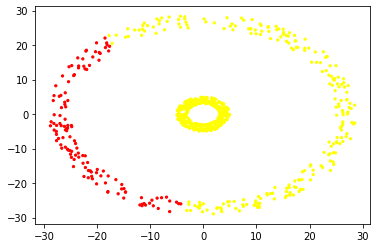

In [15]:
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="autumn")

# Algoritmo del Clustering Espectral

In [16]:
from sklearn.cluster import SpectralClustering

In [17]:
clust = SpectralClustering(2).fit_predict(data)

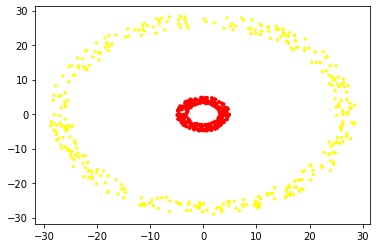

In [19]:
plt.scatter(data[:,0], data[:,1], c=clust, s=5, cmap="autumn")

* Podemos estimar la k:
    * No: Propagación de la afinidad.
    * Sí: Podemos usar la distancia Euclídea.
        * Si: K-Means
        * No: Buscar valores centrales:
            * Sí: K-Medoides
            * No: Los datos son linealmente separables:
                * Sí: Clustering aglomerativo
                * No: Clustering Espectral

# Resumen

* El clustering es un algoritmo de analisis predictivo no supervisado que se encarga de unir datos similares (juntar datos similares).
* La distancia entre observaciones es un criterio para hacer las agrupaciones y se representa en forma de matriz de disntancias nxn.
* El clustering jerarquico aglomerativo empieza con *n* clusters individuales y los va juntando en base a enlaces con la matriz de distancias.
* K-means es un algoritmo (tambien método de clustering) muy utilizado para crear *k* clusters conocido el valor de *k* o *k* centros iniciales.
* Decidir el número de clusters es importante y podemos usar la silueta o el codo.